In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as lm
import sklearn.metrics as sm

In [2]:
#获取波士顿地区房屋价格数据集
import sklearn.datasets as sd
boston = sd.load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(boston.data[0],boston.target[0])

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00] 24.0


In [12]:
#整理数据集DataFrame
data=pd.DataFrame(boston.data,columns=boston.feature_names)
data['TARGET']=boston.target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
#针对这组数据，做一些简单数据分析，了解输入输出的关系
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
data.pivot_table(index='CHAS',values='TARGET')

,TARGET
CHAS,
0.0,22.093843
1.0,28.440000


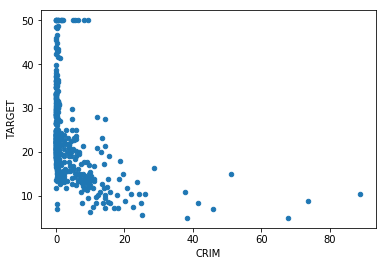

In [14]:
data.plot.scatter(x='CRIM',y='TARGET')

In [15]:
#训练机器学习模型，表达x与y的关系
x,y=data.loc[:,:'LSTAT'],data['TARGET']

In [20]:
#拆分训练集、测试集
import sklearn.model_selection as ms
train_x,test_x,train_y,test_y= \
    ms.train_test_split(
        x,y,test_size=0.1,random_state=8)

In [31]:
#使用训练集训练模型，用测试集测试模型，输出评估得分
model=lm.Ridge(1)
model.fit(train_x,train_y)
#对训练集数据做预测
pred_train_y=model.predict(train_x)
print('train:',sm.r2_score(train_y,pred_trai
                           n_y))
#对测试集数据做预测
pred_test_y=model.predict(test_x)
print('test:',sm.r2_score(test_y,pred_test_y))

train: 0.7458322939631061
test: 0.668005650847312


In [33]:
#基于多项式模型
import sklearn.pipeline as pl
import sklearn.preprocessing as sp
model=pl.make_pipeline(sp.PolynomialFeatures(2),lm.Ridge())
model.fit(train_x,train_y)
#对训练集数据做预测
pred_train_y=model.predict(train_x)
print('train:',sm.r2_score(train_y,pred_train_y))
#对测试集数据做预测
pred_test_y=model.predict(test_x)
print('test:',sm.r2_score(test_y,pred_test_y))

train: 0.9289964001279214
test: 0.7654108087741113


In [36]:
#决策树
import sklearn.tree as st
model = st.DecisionTreeRegressor(max_depth=5,random_state=8)
model.fit(train_x,train_y)
#对训练集数据做预测
pred_train_y=model.predict(train_x)
print('train:',sm.r2_score(train_y,pred_train_y))
#对测试集数据做预测
pred_test_y=model.predict(test_x)
print('test:',sm.r2_score(test_y,pred_test_y))

train: 0.9261564638945555
test: 0.7744507805195451


In [37]:
import sklearn.tree as st
import sklearn.ensemble as se

In [38]:
model = st.DecisionTreeRegressor(max_depth=5,random_state=8)
model = se.AdaBoostRegressor(model,n_estimators=200,random_state=7)
model.fit(train_x,train_y)
#对训练集数据做预测
pred_train_y=model.predict(train_x)
print('train:',sm.r2_score(train_y,pred_train_y))
#对测试集数据做预测
pred_test_y=model.predict(test_x)
print('test:',sm.r2_score(test_y,pred_test_y))

train: 0.9691444003569416
test: 0.7086350757461319
